## XGBoost Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
pd.options.mode.chained_assignment = None

import xgboost as xgb
root = '/content/drive/MyDrive/instacart/instacart-market-basket-analysis/'

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_pickle(root + 'Finaldata.pkl')
df.head()

,user_id,product_id,user_product_reorder_percentage,total_product_orders_by_user,total_product_reorders_by_user,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,order_-3,order_-2,...,total_reorders_by_user,average_order_size,reorder_in_order,prod_order_3,prod_order_2,prod_order_1,re_in_order_3,re_in_order_2,re_in_order_1,order_diff
0,1.0,196,10.0,9.0,0.899902,1.400391,19.562500,10.0,1.0,1.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
1,1.0,10258,9.0,8.0,0.888672,3.333984,19.562500,10.0,1.0,1.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
2,1.0,10326,1.0,0.0,0.000000,5.000000,28.000000,5.0,NaN,NaN,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,6.0
3,1.0,12427,10.0,9.0,0.899902,3.300781,19.562500,10.0,1.0,1.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
4,1.0,13032,3.0,2.0,0.666504,6.332031,21.671875,10.0,1.0,NaN,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0


In [ ]:
df.columns

Index(['user_id', 'product_id', 'user_product_reorder_percentage',
       'total_product_orders_by_user', 'total_product_reorders_by_user',
       'avg_add_to_cart_by_user', 'avg_days_since_last_bought',
       'last_ordered_in', 'order_-3', 'order_-2', 'order_-1', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'reordered',
       'mean_add_to_cart_order', 'reorder_rate', 'total_orders',
       'total_reorders', 'unique_users', 'order_1st_total_cnt',
       'order_2nd_total_cnt', 'is_organic', 'order_2nd_rate',
       'aisle_mean_add_to_cart_order', 'aisle_std_add_to_cart_order',
       'aisle_reorder_percentage', 'aisle_total_orders',
       'aisle_total_reorders', 'aisle_unique_users', 'aisle_0', 'aisle_1',
       'aisle_2', 'aisle_3', 'aisle_4', 'aisle_5', 'aisle_6', 'aisle_7',
       'department_mean_add_to_cart_order', 'department_std_add_to_cart_order',
       'department_reorder_percentage', 'department_total_orders',
       'department_total_

In [ ]:
df['order_diff'] = df.order_number - df.last_ordered_in
df.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [ ]:
df.head()

,user_product_reorder_percentage,total_product_orders_by_user,total_product_reorders_by_user,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,order_-3,order_-2,order_-1,order_number,...,total_reorders_by_user,average_order_size,reorder_in_order,prod_order_3,prod_order_2,prod_order_1,re_in_order_3,re_in_order_2,re_in_order_1,order_diff
0,10.0,9.0,0.899902,1.400391,19.562500,10.0,1.0,1.0,1.0,11.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
1,9.0,8.0,0.888672,3.333984,19.562500,10.0,1.0,1.0,1.0,11.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
2,1.0,0.0,0.000000,5.000000,28.000000,5.0,NaN,NaN,NaN,11.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,6.0
3,10.0,9.0,0.899902,3.300781,19.562500,10.0,1.0,1.0,1.0,11.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0
4,3.0,2.0,0.666504,6.332031,21.671875,10.0,1.0,NaN,NaN,11.0,...,0.694824,0.706055,5.898438,0.666504,1.0,0.666504,6,6,9,1.0


In [ ]:
df.shape

(8474661, 68)

In [ ]:
label = 'reordered'
x_cols = df.columns.drop('reordered')

In [ ]:
X = df[x_cols]
y = df[label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6355995, 67) (6355995,)
(2118666, 67) (2118666,)


In [ ]:
y_train.value_counts()

0.0    5734377
1.0     621618
Name: reordered, dtype: int64

In [ ]:
np.ceil(y_train.value_counts()[0]/y_train.value_counts()[1])

10.0

In [ ]:
y_test.value_counts()

0.0    1911460
1.0     207206
Name: reordered, dtype: int64

### XGBoost Model

In [ ]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
xgb_params = {
    "objective"        :"reg:logistic",
    "eval_metric"      :"logloss",
    "tree_method"      :"exact",
    "eta"              :0.1,
    "max_depth"        :6,
    "min_child_weight" :10,
    "gamma"            :0.70,
    "subsample"        :0.76,
    "colsample_bytree" :0.95,
    "alpha"            :2e-05,
    "scale_pos_weight" :10,
    "lambda"           :10
}

In [ ]:
watchlist= [(D_train, "train")]
model = xgb.train(params=xgb_params, dtrain=D_train, num_boost_round = 80, evals = watchlist, verbose_eval = 10)

[0]	train-logloss:0.665619
[10]	train-logloss:0.553871
[20]	train-logloss:0.533304
[30]	train-logloss:0.527607
[40]	train-logloss:0.524945
[50]	train-logloss:0.523517
[60]	train-logloss:0.52267
[70]	train-logloss:0.521913
[79]	train-logloss:0.521178


In [ ]:
probability = model.predict(D_test)

In [ ]:
predictions = [1 if i > 0.5 else 0 for i in probability]


 Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.74      0.84   1911460
         1.0       0.24      0.77      0.37    207206

    accuracy                           0.74   2118666
   macro avg       0.60      0.75      0.60   2118666
weighted avg       0.90      0.74      0.79   2118666

Accuracy   Score :  0.7423038836701963
F1 Score:  0.36842714097984414
Area under curve :  0.8342153530139002 



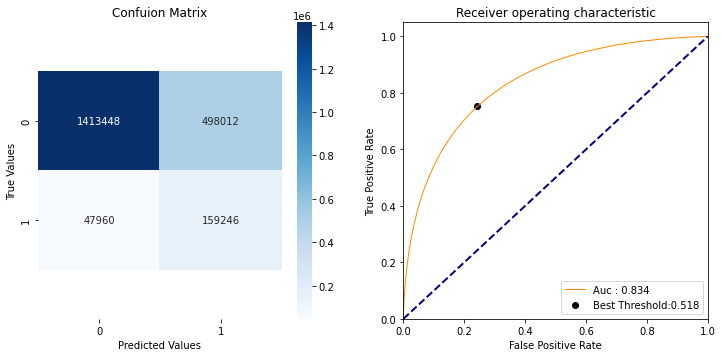

In [ ]:
print ("\n Classification report : \n",classification_report(y_test, predictions))
print ("Accuracy   Score : ",accuracy_score(y_test, predictions))

#confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

#f1-score
f1 = f1_score(y_test, predictions)
print("F1 Score: ", f1)

#roc_auc_score
model_roc_auc = roc_auc_score(y_test,probability) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probability)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = np.round(thresholds[ix],3)

plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

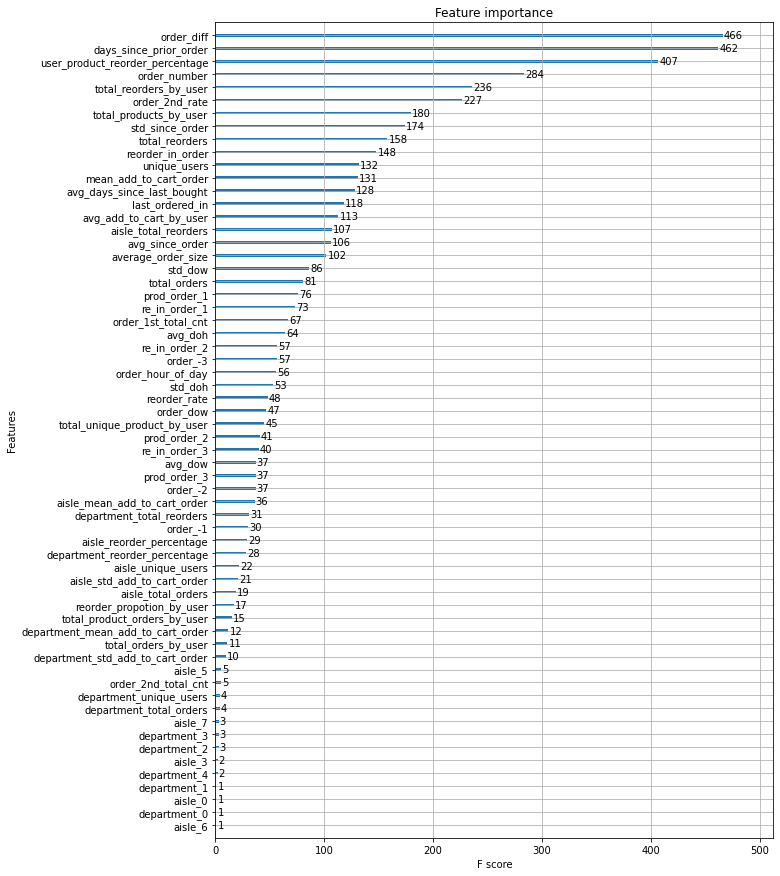

In [ ]:
fig, ax = plt.subplots(figsize = (10,15))
xgb.plot_importance(model, ax = ax)
fig.savefig('XGBoost Feature Importance Plot.png')

In [ ]:
submission = df[['order_id', 'products']]  ## 데이터프래임 생성
submission.reset_index(inplace=True)
submission = submission.sort_values(by ='order_id')
submission = submission.fillna('None')
submission.to_csv('submission.csv',index=False)

KeyError: ignored